# Hello Pulse
#### @Thomas Alexander  & @Nate Earnest-Noble - Qiskit Slack 
#### @talexander2718 & @nathanearnestnoble - Github

We'll be using Qiskit Pulse throughout these tutorials. The tutorials will use a series of Jupyter notebooks to introduce you to Qiskit Pulse. This notebook will guide your through getting setup.

### Preamble

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Installation

The tutorial consists of a single main notebook and two exercise notebooks. There are also a number of ancillary Python files and images. The notebooks can be run locally or through IQX.

Please follow one of the installation guides below to get started:

### IQX

- [Sign up for an IQX account](https://quantum-computing.ibm.com/)
- Git clone or download the tutorial notebooks and extra files [here](https://github.com/Travis-S-IBM/IBM-Quantum-QCE20-Tutorials/tree/master/Hardware)
- Upload **all files** in the Qiskit pulse hardware tutorial [here](https://github.com/Travis-S-IBM/IBM-Quantum-QCE20-Tutorials/blob/master/Uploading.md) to the IQX following these [instructions](https://github.ibm.com/Travis-Scholten/qce20-tutorials/blob/master/Uploading.md)
    - It is Ok if you don't upload the image files as the notebooks will still run, there just won't be images.
    - You will need the notebooks `*.ipynb`, `*.py` files, and `*.json` files.
- Click the notebook you want to run in IQX to launch it.
- Great, you should be installed! Goto the "First Experiment" section

### Local

- Install Qiskit by following these [instructions](https://qiskit.org/documentation/install.html).
    - Remember to setup your IQX key
- Git clone or download the IEEE IBM Quantum tutorial repository. `git clone git@github.com:Travis-S-IBM/IBM-Quantum-QCE20-Tutorials.git`
    - Notebooks and extra files for this tutorial can be found [here](https://github.com/Travis-S-IBM/IBM-Quantum-QCE20-Tutorials/tree/master/Hardware). Navigate to this folder
- Make sure you have version >0.20 installed:
- Make sure to install Jupyter notebook and matplotlib `pip install jupyter matplotlib scipy`
- Launch Jupyter notebook `jupyter notebook` in [this](https://github.com/Travis-S-IBM/IBM-Quantum-QCE20-Tutorials/tree/master/Hardware) folder root
- Open up this notebook "Hello Pulse" and run to check your installation and run your first pulse program on real hardware.

In [2]:
import qiskit.tools.jupyter

%qiskit_version_table

- Launch this tutorial notebook from Jupyter in the tutorial root folder
- Great, you should be installed! Goto the "First Experiment" section

## First Experiment
Let's test out our installation by running our first pulse experiment on a backend. Here we will load a backend with pulse access, create a circuit to prepare and measure a hadamard and then lower this program to its pulse schedule representation before running it on the hardware.

Load our backend. We will be using `ibmq_rome`, with a hub/group/project that has access to pulse for today.

In [3]:
hub = 'ibm-q-community'
group = 'ieee-session'
project = 'main'
backend_name = 'ibmq_rome'

In [4]:
from qiskit import IBMQ
# load account credentials
IBMQ.load_account()
# load provider
provider = IBMQ.get_provider(hub=hub, group=group, project=project)
# Get our backend
backend = provider.get_backend(backend_name)

Prepare our circuit:

In [5]:
from qiskit import QuantumCircuit

h_qc = QuantumCircuit(1, 1)
h_qc.h(0)
h_qc.measure(0, 0)
h_qc.draw(idle_wires=False)

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

Transpile our quantum circuit for the hardware basis gates.

In [6]:
from qiskit import transpile

h_qc_transpiled = transpile(h_qc, backend)
h_qc_transpiled.draw(idle_wires=False)

┌──────────┐┌─┐
q_0 -> 0 ┤ U2(0,pi) ├┤M├
         └──────────┘└╥┘
    c: 1/═════════════╩═
                      0

These are the instructions the hardware understands:

In [7]:
backend.configuration().basis_gates

['id', 'u1', 'u2', 'u3', 'cx']

Schedule our circuit into its representation as a pulse `Schedule`. Don't worry, we'll learn about what is going on here in the following tutorial sessions.

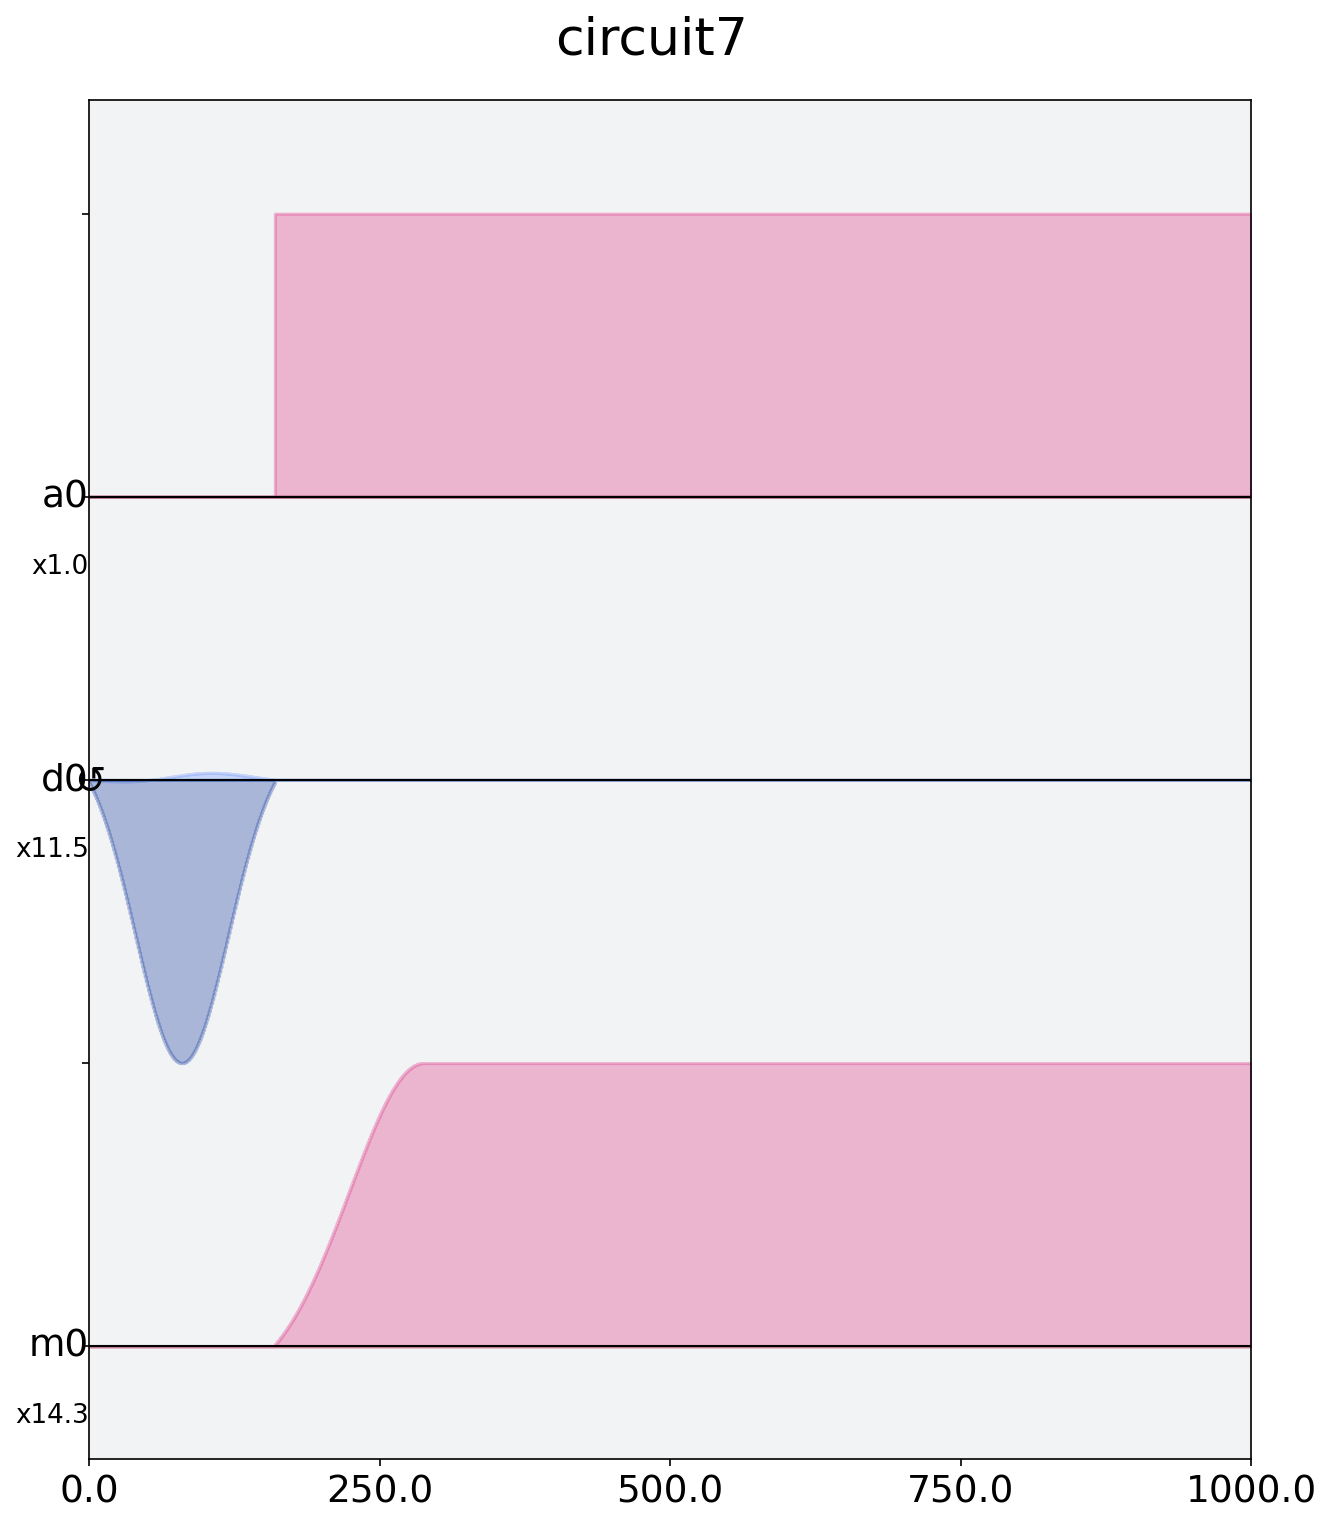

In [8]:
from qiskit import schedule
from qiskit import pulse

h_sched = schedule(h_qc_transpiled, backend)
h_sched.draw(channels=[pulse.DriveChannel(0), pulse.MeasureChannel(0), pulse.AcquireChannel(0)], plot_range=[0, 1000])

Execute this schedule on our backend:

In [9]:
from qiskit import execute
from qiskit.tools.monitor import job_monitor

job = execute(h_sched, backend, shots=1024, meas_level=2)
# In pulse we have 3 measurement levels
print(job.job_id())
job_monitor(job)

5f85a894471ef10019c0eb8d
Job Status: job has successfully run


Get our result. For pulse jobs we need to measure all qubits, so we'll need to throw away the data we don't need:

In [10]:
from qiskit.result.utils import marginal_counts

result = marginal_counts(job.result(), indices=[0])

Display our result:

{'0': 491, '1': 533}


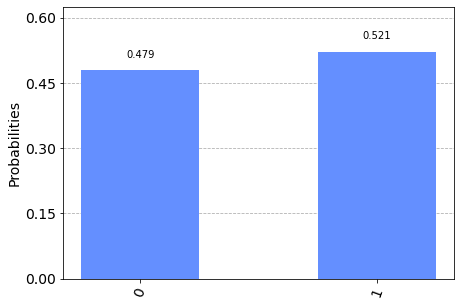

In [11]:
from qiskit.visualization import plot_histogram

h_counts = result.get_counts(0)
print(h_counts)
plot_histogram([h_counts])

Up to shot noise we see the equi-probability distribution we expect for $|0>$ and $|1>$ state measurements.